In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("../data/gold_price_data.csv")
print("✅ Dataset loaded successfully")

✅ Dataset loaded successfully


In [4]:
data.dropna(inplace=True)

In [5]:
X = data[['SPX', 'USO', 'SLV', 'EUR/USD']]
y = data['GLD']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# 4️⃣ Train Random Forest Regressor
# -------------------------------
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [8]:
# 5️⃣ Evaluate Model
# -------------------------------
y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Performance:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Random Forest Performance:
MAE: 1.24
MSE: 5.47
R² Score: 0.99


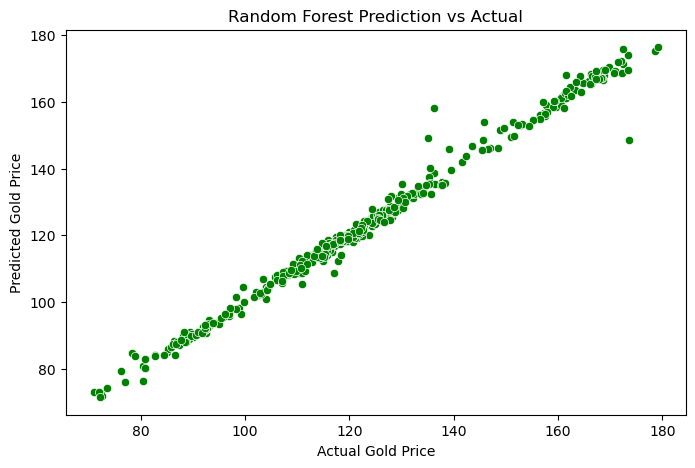

In [9]:
# 6️⃣ Visualization
# -------------------------------
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred, color='green')
plt.xlabel("Actual Gold Price")
plt.ylabel("Predicted Gold Price")
plt.title("Random Forest Prediction vs Actual")
plt.show()

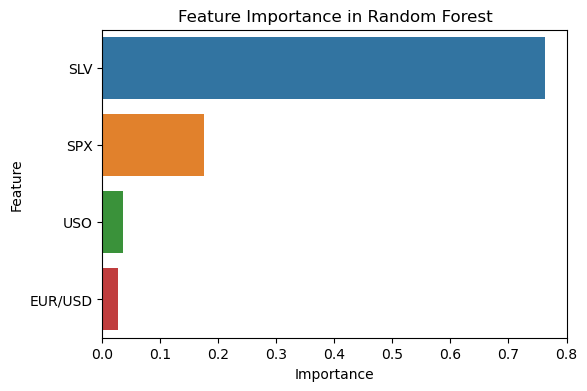

In [10]:
# 7️⃣ Feature Importance
# -------------------------------
importance = rf_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(6,4))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance in Random Forest')
plt.show()